# Importing Data

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('C:/Users/dell/OneDrive/Documents/Titanic data for data science/SMS Detection.csv')
data

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


# Exploratory Data Analysis

In [2]:
data.describe()

,label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [3]:
data.isnull().sum()

sms      0
label    0
dtype: int64

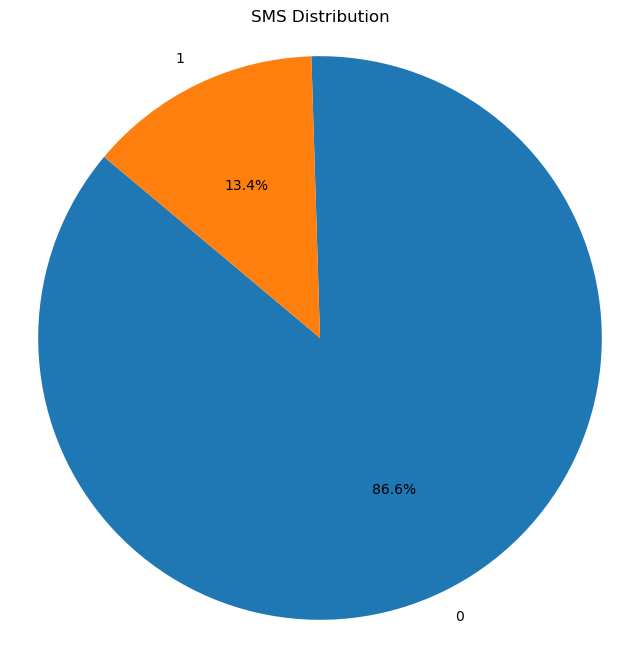

In [15]:
import matplotlib.pyplot as plt

labels = data['label'].value_counts().index.tolist()
sizes = data['label'].value_counts().values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('SMS Distribution')
plt.axis('equal') 

plt.show()


# Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=data['sms']
Y=data['label']

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.2,random_state=100)

# Feature Extraction

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clt=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
    ])

In [9]:
clt.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

# Make Predictions

In [10]:
SMS = [
    'Sounds great! Are you home now?',
    'Free entry in 2 a wkly comp to win FA '
]

predictions = clt.predict(SMS)

for i, prediction in enumerate(predictions):
    if prediction == 0:
        print(f"Email {i+1}: Ham")
    else:
        print(f"Email {i+1}: Spam")

Email 1: Ham
Email 2: Spam


In [14]:
SMS = [
    'Sounds great! Are you home now?',
    'You canme to work? '
]

predictions = clt.predict(SMS)

for i, prediction in enumerate(predictions):
    if prediction == 0:
        print(f"Email {i+1}: Ham")
    else:
        print(f"Email {i+1}: Spam")

Email 1: Ham
Email 2: Ham


# Accuracy of the Model

In [12]:
clt.score(X_train,Y_train)

0.9964093357271095